In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("data/data.csv")
data.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


In [4]:
data["artists"] = data["artists"].map(lambda x: x.replace("['", ""))
data["artists"] = data["artists"].map(lambda x: x.replace("']", ""))
data["artists"] = data["artists"].map(lambda x: x.replace("'", ""))

In [5]:
data["artists"]

0                            Carl Woitschach
1         Robert Schumann, Vladimir Horowitz
2                        Seweryn Goszczyński
3                           Francisco Canaro
4         Frédéric Chopin, Vladimir Horowitz
                         ...                
169904                      DripReport, Tyga
169905          Leon Bridges, Terrace Martin
169906                       Kygo, Oh Wonder
169907               Cash Cash, Andy Grammer
169908                        Ingrid Andress
Name: artists, Length: 169909, dtype: object

In [6]:
data.loc[(data["name"] == "Blank Space") & (data["artists"] == "Taylor Swift")]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87359,0.085,Taylor Swift,0.752,231827,0.678,0,1p80LdxRV74UKvL8gnD7ky,0.000002,5,0.1300,-5.421,1,Blank Space,71,2014-10-27,0.0646,96.009,0.583,2014
116046,0.103,Taylor Swift,0.760,231827,0.703,0,1kHEuJRasudLhjvnbfc4yS,0.000000,5,0.0913,-5.412,1,Blank Space,62,2014-10-27,0.0540,95.997,0.570,2014
116088,0.103,Taylor Swift,0.760,231827,0.703,0,2sC2P3BN0IXujNaaSyDmtP,0.000000,5,0.0913,-5.412,1,Blank Space,58,2014-10-27,0.0540,95.997,0.570,2014


In [7]:
data = data.drop_duplicates(subset=["name", "artists"], keep="first")

In [8]:
data.loc[(data["name"] == "Blank Space") & (data["artists"] == "Taylor Swift")]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87359,0.085,Taylor Swift,0.752,231827,0.678,0,1p80LdxRV74UKvL8gnD7ky,0.000002,5,0.13,-5.421,1,Blank Space,71,2014-10-27,0.0646,96.009,0.583,2014


In [9]:
data.head(15)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,Carl Woitschach,0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"Robert Schumann, Vladimir Horowitz",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,Seweryn Goszczyński,0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,Francisco Canaro,0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"Frédéric Chopin, Vladimir Horowitz",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"Felix Mendelssohn, Vladimir Horowitz",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"Franz Liszt, Vladimir Horowitz",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,Carl Woitschach,0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"Francisco Canaro, Charlo",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,Seweryn Goszczyński,0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


In [10]:
data.shape

(156608, 19)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5228363d0>]],
      dtype=object)

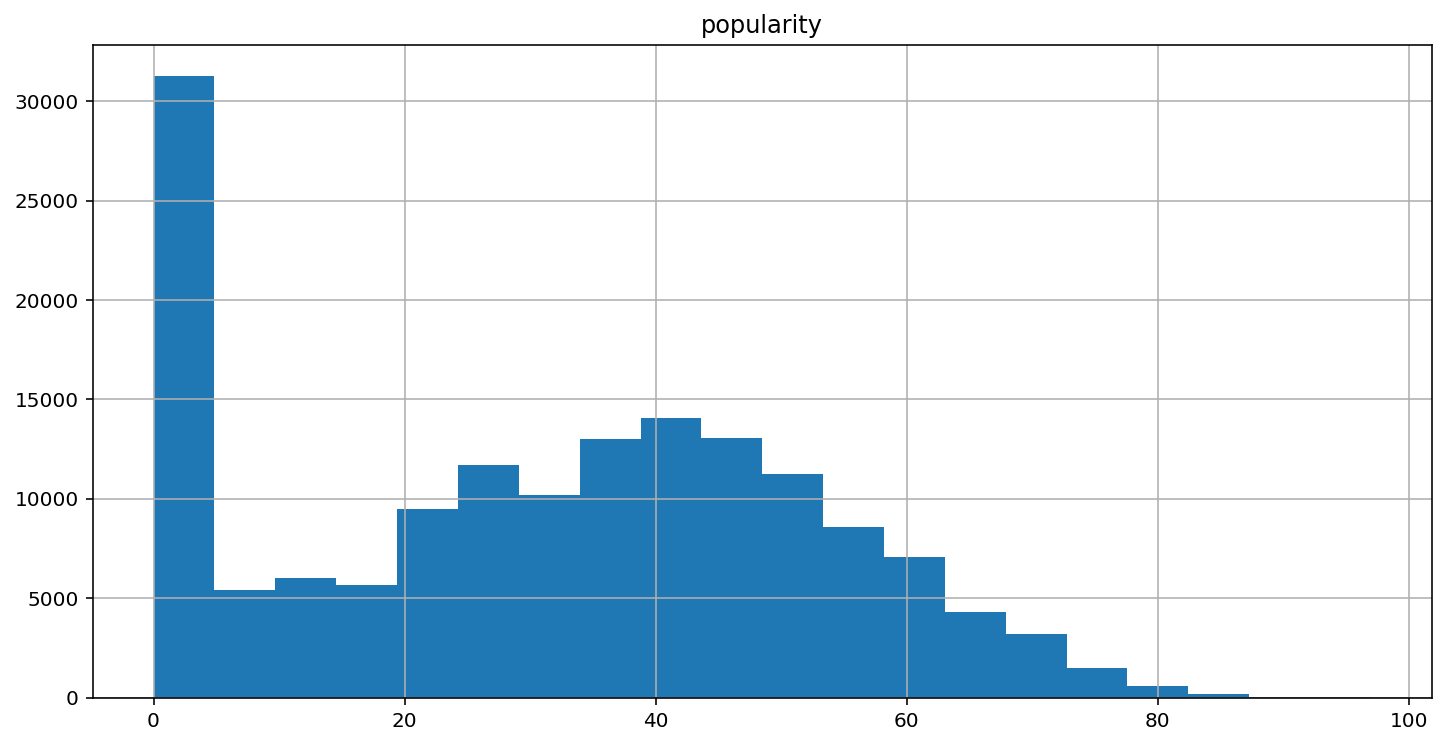

In [11]:
data.hist(column="popularity", figsize=(12, 6), bins=20)

In [12]:
data.drop(data[data["popularity"] < 30].index, axis=0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff521b7bfd0>]],
      dtype=object)

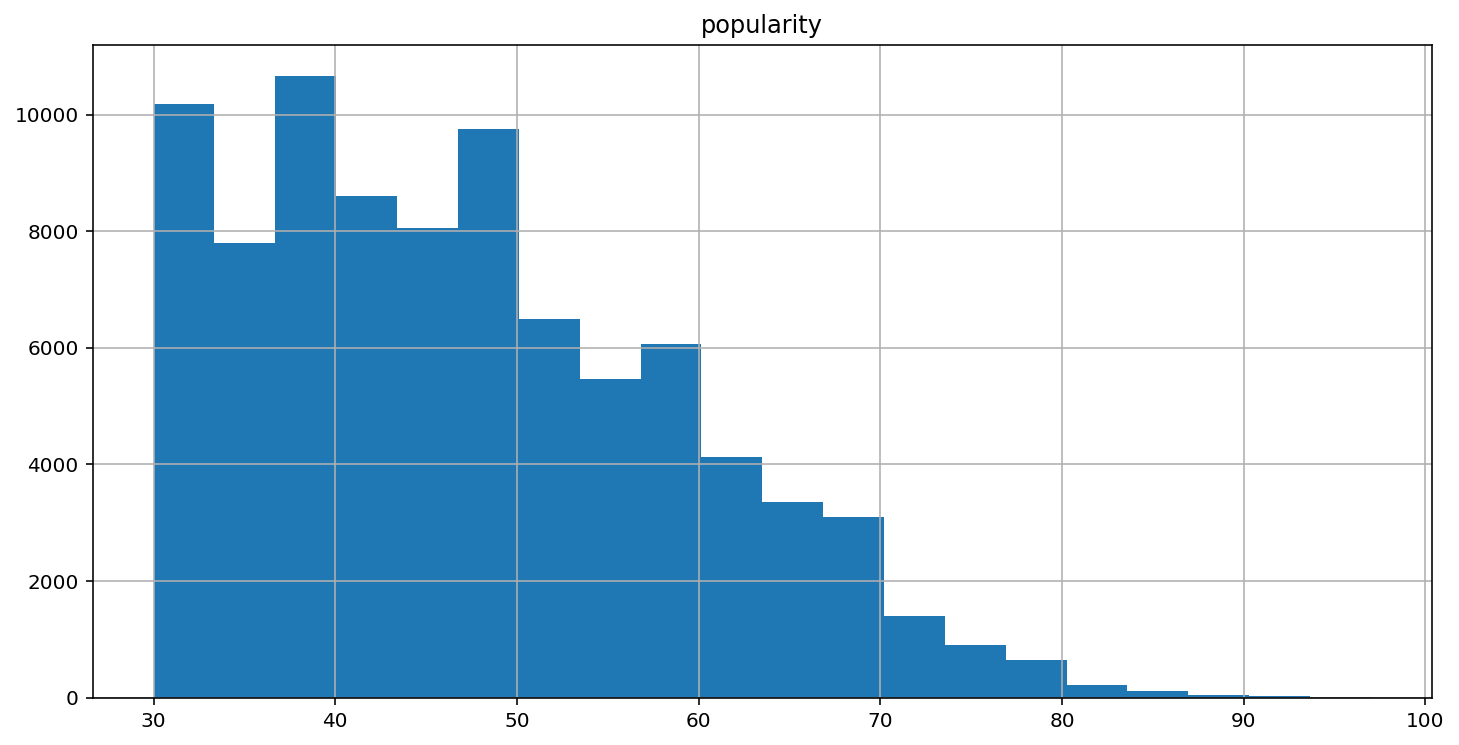

In [13]:
data.hist(column="popularity", figsize=(12, 6), bins=20)

In [14]:
data.sort_values(by="popularity", axis=0, ascending=False, inplace=True)
data.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87949,0.7310,"Powfu, beabadoobee",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.2330,"THE SCOTTS, Travis Scott, Kid Cudi",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87840,0.1040,Roddy Ricch,0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019
87852,0.0686,"Surf Mesa, Emilee",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019
87844,0.3050,"BENEE, Gus Dapperton",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
87858,0.6920,Tones And I,0.824,209438,0.588,0,2XU0oxnq2qxCpomAAuJY8K,0.000104,6,0.1490,-6.400,0,Dance Monkey,94,2019-10-17,0.0924,98.027,0.513,2019
87943,0.7490,StaySolidRocky,0.728,147800,0.431,0,5RqR4ZCCKJDcBLIn4sih9l,0.000000,6,0.0996,-9.966,0,Party Girl,94,2020-04-21,0.0622,130.022,0.629,2020
87953,0.2230,"Ariana Grande, Justin Bieber",0.597,228482,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,0.3820,-6.658,1,Stuck with U (with Justin Bieber),94,2020-05-08,0.0418,178.765,0.537,2020
87952,0.0210,"Lady Gaga, Ariana Grande",0.672,182200,0.855,0,24ySl2hOPGCDcxBxFIqWBu,0.000000,9,0.3230,-3.764,1,Rain On Me (with Ariana Grande),94,2020-05-22,0.0397,123.056,0.646,2020
87951,0.0264,6ix9ine,0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.2510,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020


In [15]:
data.shape

(87009, 19)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87009 entries, 87949 to 66524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      87009 non-null  float64
 1   artists           87009 non-null  object 
 2   danceability      87009 non-null  float64
 3   duration_ms       87009 non-null  int64  
 4   energy            87009 non-null  float64
 5   explicit          87009 non-null  int64  
 6   id                87009 non-null  object 
 7   instrumentalness  87009 non-null  float64
 8   key               87009 non-null  int64  
 9   liveness          87009 non-null  float64
 10  loudness          87009 non-null  float64
 11  mode              87009 non-null  int64  
 12  name              87009 non-null  object 
 13  popularity        87009 non-null  int64  
 14  release_date      87009 non-null  object 
 15  speechiness       87009 non-null  float64
 16  tempo             87009 non-null  fl

In [17]:
comma_counter = 0
for i in range(len(data)):
    string = data.iloc[i, 1]
    res = Counter(data.iloc[i, 1])
    commas = res[',']
    if(commas > comma_counter):
        comma_counter = res[',']
        
print(comma_counter)

39


In [18]:
for i in range(len(data)):
    res = Counter(data.iloc[i, 1])
    if res[','] == 39:
        print(data.iloc[i, :])

acousticness                                                    0.641
artists             Ricky Martin, Alejandro Sanz, Thalía, Juan Lui...
danceability                                                    0.276
duration_ms                                                    237467
energy                                                          0.572
explicit                                                            0
id                                             0tzixmHNQfE6S6SirSToxW
instrumentalness                                                    0
key                                                                 1
liveness                                                          0.2
loudness                                                       -7.818
mode                                                                1
name                        El Ultimo Adiós - Varios Artistas Version
popularity                                                         68
release_date        

In [19]:
#data["artists"] = data["artists"].map(lambda x: x.split(', ')[:2])

In [20]:
data["full_name"] = data["name"] + " " + data["artists"]

In [21]:
data.drop(["id"], axis=1, inplace=True)

In [22]:
data["id"] = ""

In [23]:
for i in range(len(data)):
    data.iloc[i, 19] = str(i)

In [24]:
mask = data["full_name"].str.contains("taylor swift", case=False)
data[mask]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,full_name,id
97658,0.03300,"Taylor Swift, Brendon Urie, Panic! At The Disco",0.610,193000,0.830,0,0.000000,0,0.1180,-4.105,1,ME! (feat. Brendon Urie of Panic! At The Disco),83,2019-08-23,0.0571,182.162,0.728,2019,ME! (feat. Brendon Urie of Panic! At The Disco...,220
87912,0.00929,Taylor Swift,0.771,171360,0.671,0,0.000000,2,0.0637,-5.617,1,You Need To Calm Down,83,2019-08-23,0.0553,85.026,0.714,2019,You Need To Calm Down Taylor Swift,231
97640,0.07670,Taylor Swift,0.777,190360,0.658,0,0.000000,0,0.0901,-5.191,1,The Man,82,2019-08-23,0.0540,110.048,0.633,2019,The Man Taylor Swift,284
97654,0.49200,Taylor Swift,0.359,221307,0.543,0,0.000016,7,0.1180,-7.582,1,Lover,81,2019-08-23,0.0919,68.534,0.453,2019,Lover Taylor Swift,320
106978,0.05860,"ZAYN, Taylor Swift",0.731,247160,0.445,0,0.000020,0,0.1400,-8.418,1,I Don’t Wanna Live Forever (Fifty Shades Darker),78,2017-11-09,0.0533,117.970,0.106,2017,I Don’t Wanna Live Forever (Fifty Shades Darke...,699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14938,0.61100,Taylor Swift,0.664,245347,0.447,0,0.000001,1,0.1390,-8.535,1,The Best Day,44,2008-11-11,0.0292,126.079,0.364,2008,The Best Day Taylor Swift,48076
14945,0.16900,Taylor Swift,0.476,237600,0.816,0,0.000000,4,0.2380,-4.279,1,The Other Side Of The Door,44,2008-11-11,0.0347,163.847,0.469,2008,The Other Side Of The Door Taylor Swift,48085
6935,0.06060,Taylor Swift,0.601,200560,0.852,0,0.000003,7,0.3700,-3.096,1,Tell Me Why,44,2008-11-11,0.0386,100.015,0.513,2008,Tell Me Why Taylor Swift,49205
23010,0.00471,Taylor Swift,0.548,281053,0.756,0,0.000000,5,0.1170,-4.175,1,Change,43,2008-11-11,0.0360,96.038,0.224,2008,Change Taylor Swift,51428


In [25]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,full_name,id
87949,0.7310,"Powfu, beabadoobee",0.726,173333,0.431,0,0.00000,8,0.696,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020,death bed (coffee for your head) (feat. beabad...,0
87941,0.2330,"THE SCOTTS, Travis Scott, Kid Cudi",0.716,165978,0.537,1,0.00000,0,0.157,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020,"THE SCOTTS THE SCOTTS, Travis Scott, Kid Cudi",1
87840,0.1040,Roddy Ricch,0.896,196653,0.586,1,0.00000,10,0.790,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019,The Box Roddy Ricch,2
87852,0.0686,"Surf Mesa, Emilee",0.674,176547,0.774,0,0.00188,11,0.393,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019,ily (i love you baby) (feat. Emilee) Surf Mesa...,3
87844,0.3050,"BENEE, Gus Dapperton",0.863,223480,0.631,1,0.00003,7,0.123,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019,"Supalonely BENEE, Gus Dapperton",4


In [26]:
data.columns.get_loc("popularity")

12

In [27]:
song_meta = data[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]]

In [28]:
song_names = data[["id", "name", "artists", "full_name", "explicit"]]

In [29]:
song_meta.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness
87949,0.7310,0.726,0.431,0.00000,0.696,0.1350
87941,0.2330,0.716,0.537,0.00000,0.157,0.0514
87840,0.1040,0.896,0.586,0.00000,0.790,0.0559
87852,0.0686,0.674,0.774,0.00188,0.393,0.0892
87844,0.3050,0.863,0.631,0.00003,0.123,0.0534


In [30]:
song_names.head()

,id,name,artists,full_name,explicit
87949,0,death bed (coffee for your head) (feat. beabad...,"Powfu, beabadoobee",death bed (coffee for your head) (feat. beabad...,0
87941,1,THE SCOTTS,"THE SCOTTS, Travis Scott, Kid Cudi","THE SCOTTS THE SCOTTS, Travis Scott, Kid Cudi",1
87840,2,The Box,Roddy Ricch,The Box Roddy Ricch,1
87852,3,ily (i love you baby) (feat. Emilee),"Surf Mesa, Emilee",ily (i love you baby) (feat. Emilee) Surf Mesa...,0
87844,4,Supalonely,"BENEE, Gus Dapperton","Supalonely BENEE, Gus Dapperton",1


In [31]:
limit = 40000

In [32]:
song_meta = song_meta[:limit]
song_names = song_names[:limit]

In [33]:
song_names.shape

(40000, 5)

In [57]:
mask = mask = song_names["full_name"].str.contains("photograph", case=False)
song_names[mask]

,id,name,artists,full_name,explicit
161220,7644,Photograph,J. Cole,Photograph J. Cole,1
87334,8276,Photograph,Ed Sheeran,Photograph Ed Sheeran,0
83330,15892,Photograph,Ringo Starr,Photograph Ringo Starr,0
134545,24946,Itchin' on a Photograph,Grouplove,Itchin' on a Photograph Grouplove,0
92976,28798,Photographs & Memories,Jim Croce,Photographs & Memories Jim Croce,0
124583,33517,This Photograph Is Proof (I Know You Know),Taking Back Sunday,This Photograph Is Proof (I Know You Know) Tak...,0
54954,39442,Photograph,Def Leppard,Photograph Def Leppard,0


In [35]:
data.iloc[4835, :]

acousticness                           0.17
artists                        Taylor Swift
danceability                          0.618
duration_ms                          235267
energy                                0.741
explicit                                  0
instrumentalness                          0
key                                       2
liveness                             0.0822
loudness                              -3.95
mode                                      1
name                             Love Story
popularity                               68
release_date                     2008-11-11
speechiness                           0.031
tempo                               118.984
valence                               0.296
year                                   2008
full_name           Love Story Taylor Swift
id                                     4835
Name: 86764, dtype: object

In [36]:
data.iloc[44113, :]

acousticness                          0.168
artists                      The Band Perry
danceability                          0.608
duration_ms                          227840
energy                                0.732
explicit                                  0
instrumentalness                          0
key                                       2
liveness                             0.0817
loudness                             -4.254
mode                                      1
name                               Chainsaw
popularity                               46
release_date                     2013-01-01
speechiness                          0.0251
tempo                                84.006
valence                               0.656
year                                   2013
full_name           Chainsaw The Band Perry
id                                    44113
Name: 54972, dtype: object

In [37]:
song_meta.to_csv("meta/meta.csv", index=False)
song_names.to_csv("meta/name.csv", index=False)